# 1. Install Dependencies and Setup

In [8]:
!pip install tensorflow tensorflow-cpu opencv-python matplotlib


  Using cached tensorflow_cpu-2.12.0-cp39-cp39-win_amd64.whl (2.0 kB)


In [11]:
!pip install --upgrade pip

In [1]:

!pip3 install tensorflow

In [3]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

In [2]:

pip uninstall tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\user\appdata\roaming\python\python39\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras-nightly, keras-preprocessing, numpy, opt-einsum, protobuf, six, tensorboard, tensorflow-estimator, termcolor, typing-extensions, wheel, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install --ignore-installed --user tensorflow 


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\AppData\\Roaming\\Python\\Python39\\site-packages\\numpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Check the permissions.




  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached h5py-3.8.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached setuptools-67.6.1-py3-none-any.whl (1.1 MB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached numpy-1.2

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [14]:
tf.config.list_physical_devices('GPU')

NameError: name 'tf' is not defined

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [5]:

import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.preprocessing.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

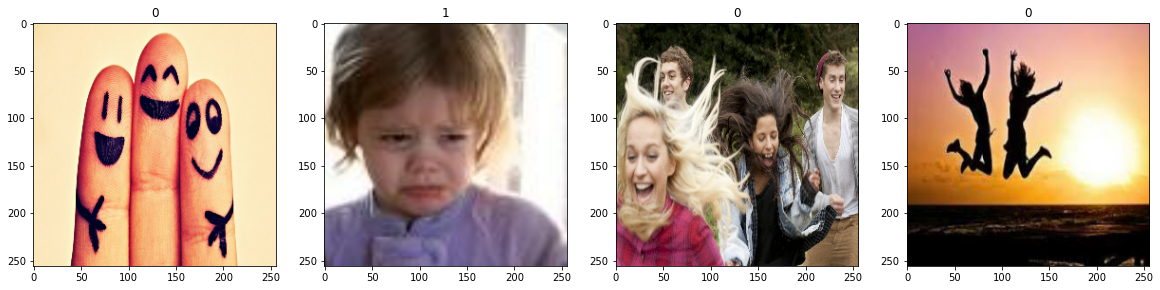

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.94014245, 0.94014245, 0.9087699 ],
          [0.8398897 , 0.8398897 , 0.8082874 ],
          [0.9925398 , 0.9925398 , 0.9531327 ],
          ...,
          [0.7752221 , 0.81070775, 0.59406406],
          [0.7575521 , 0.7890395 , 0.5961933 ],
          [0.78792894, 0.8154182 , 0.65044427]],
 
         [[0.9698058 , 0.9698058 , 0.93843323],
          [0.8652188 , 0.8652188 , 0.8336165 ],
          [0.95651764, 0.95651764, 0.9172313 ],
          ...,
          [0.8160714 , 0.84908307, 0.6422144 ],
          [0.7635872 , 0.79500216, 0.60724884],
          [0.790427  , 0.8154665 , 0.6603401 ]],
 
         [[0.96929216, 0.970801  , 0.93942845],
          [0.8854565 , 0.88700956, 0.8553631 ],
          [0.91968775, 0.9227055 , 0.88198096],
          ...,
          [0.7799869 , 0.8085332 , 0.61787283],
          [0.7477742 , 0.7746643 , 0.6004532 ],
          [0.8096418 , 0.8302153 , 0.6884249 ]],
 
         ...,
 
         [[0.41059756, 0.56022227, 0.3442296 ],
          [0.31849

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

# 7. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 743ms/step - loss: 0.9805 - accuracy: 0.4955 - val_loss: 0.6586 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 6s 670ms/step - loss: 0.6473 - accuracy: 0.6339 - val_loss: 0.5960 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 6s 669ms/step - loss: 0.6411 - accuracy: 0.6830 - val_loss: 0.5321 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 6s 662ms/step - loss: 0.5038 - accuracy: 0.7768 - val_loss: 0.4601 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 6s 668ms/step - loss: 0.4428 - accuracy: 0.8438 - val_loss: 0.3955 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 6s 670ms/step - loss: 0.2972 - accuracy: 0.9018 - val_loss: 0.2960 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 6s 698ms/step - loss: 0.2608 - accuracy: 0.9018 - val_loss: 0.3610 - val_accuracy: 0.8906
Epoch 8/20
7/7 [====

# 8. Plot Performance

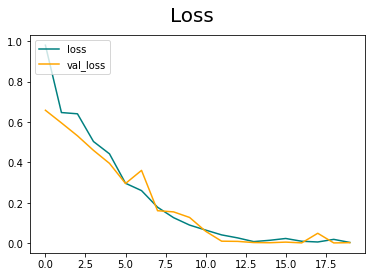

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

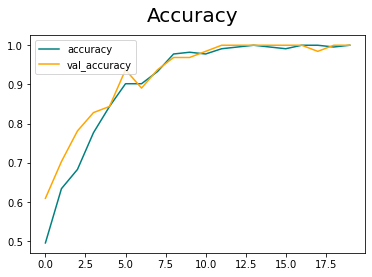

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

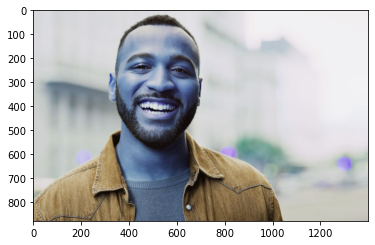

In [45]:
img = cv2.imread('05-12-21-happy-people.jpg')
plt.imshow(img)
plt.show()

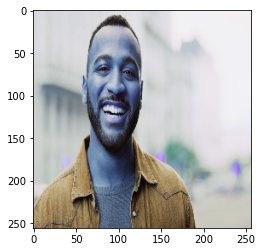

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [48]:
yhat

array([[0.01577204]], dtype=float32)

In [49]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)